# Homework 11 - Advanced SQL

## Yves-Andre Chapuis

# Step 1 - Climate Analysis and Exploration

## 1. Import Libraries

In [1]:
## Numpy and Pandas Libraries
import numpy as np
import pandas as pd

In [2]:
# Matplotlib Library
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
# Datetime library
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

## 2. Get Data

### Generate DataFrames and Clean Data

In [5]:
# Generate a DataFrame
# Clean data in .csv file
measurements_df = pd.read_csv('./hawaii_measurements.csv').dropna()
measurements_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
5,USC00519397,2010-01-07,0.06,70


In [6]:
# Generate a DataFrame
# No need to clean data
stations_df = pd.read_csv('./hawaii_stations.csv')
stations_df.head()

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [7]:
# Generate .csv Files from DataFrame
measurements_df.to_csv('clean_hawaii_measurements.csv')
stations_df.to_csv('clean_hawaii_stations.csv')

## 3. Setup and Reflect sqlite Database

### Setup Database

In [8]:
# Using create_engine()to connect to a virtual database 
engine = create_engine("sqlite:///hawaii.sqlite")

### Reflect sqlite database

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

## 4. Exploratory Climate Analysis

### Precipitation data

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

##  Get date with last measurement data 
measure_dates = session.query(Measurement).order_by(Measurement.date.desc()).limit(1)
for date in measure_dates:
    last_measure_date = date.date
    
print(last_measure_date)

2017-08-23


In [14]:
# Calculate the date 1 year ago from today
last_measure_date = dt.datetime.strptime(last_measure_date, "%Y-%m-%d") # Date convertion
one_year_ago_date = last_measure_date - dt.timedelta(days=365)

print(last_measure_date)
print(dt.timedelta(days=365))
print(one_year_ago_date)

2017-08-23 00:00:00
365 days, 0:00:00
2016-08-23 00:00:00


In [15]:
prcp_data = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= one_year_ago_date).\
        all()
print(prcp_data)

[('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 0.0), ('2016-10-09', 

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column

## Generate the Pandas DateFrame from the precipitation data 
prcp_data_df1 = pd.DataFrame(prcp_data).dropna()

## Set the index to the data column
prcp_data_df1.set_index('date', inplace=True)

prcp_data_df1.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [17]:
# Sort the dataframe by date

prcp_data_df2 = prcp_data_df1.sort_values('date')

prcp_data_df2.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,1.22
2016-08-24,2.28
2016-08-24,1.45
2016-08-24,2.15


### Precipitation plotting

<IPython.core.display.Javascript object>


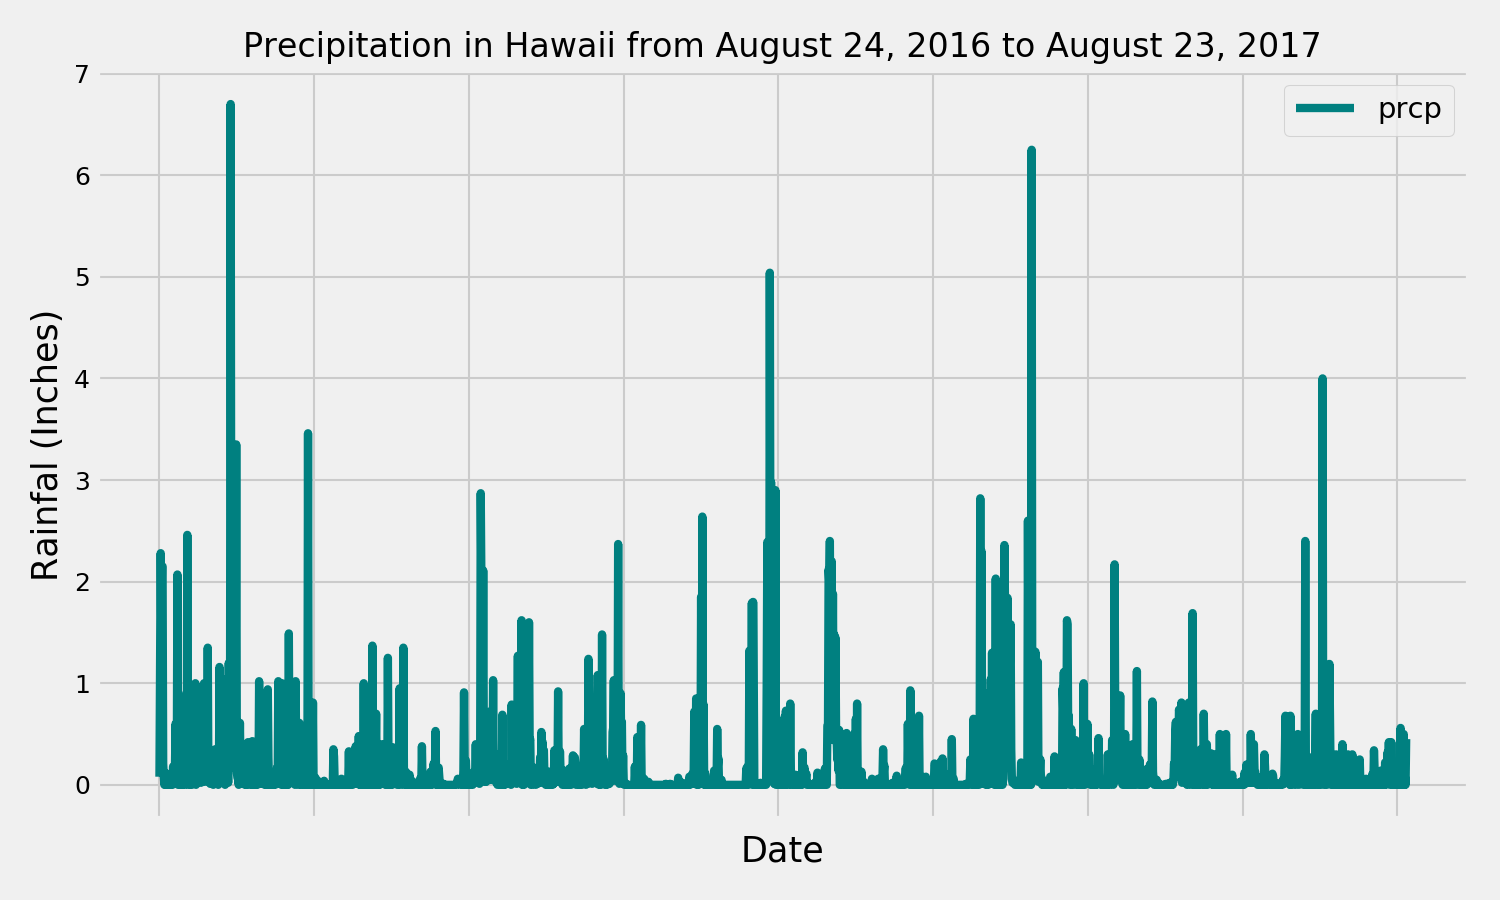

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_data_df2.plot(figsize=(10,6), rot=30, color='teal', fontsize=12)
plt.legend(loc=1, prop={'size': 14})
plt.title('Precipitation in Hawaii from August 24, 2016 to August 23, 2017', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Rainfal (Inches)')

plt.show()

In [19]:
# Rotate the xticks for the dates

'''
plt.xticks(rotation='90')
'''

plt.xticks(rotation='90')

plt.show()

In [20]:
# Plot
plt.tight_layout()
plt.show()

### Precipitation statistics

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_data_df2.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## 5. Station Analysis

### Station data

In [22]:
# How many stations are available in this dataset?

station_count = session.query(Station).distinct().count()

print(session.query(Station))
print(session.query(Station).distinct())
print(session.query(Station).distinct().count())
print(f"The number of weather stations on Honolulu Hawaii are {station_count}.")

SELECT station.id AS station_id, station.station AS station_station, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station
SELECT DISTINCT station.id AS station_id, station.station AS station_station, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station
9
The number of weather stations on Honolulu Hawaii are 9.


In [23]:
# What are the most active stations?

## List the stations and the counts in descending order.
station_measure_count = session.query(Measurement.station, func.count(Measurement.station)).\
                                    group_by(Measurement.station).\
                                    order_by(-func.count(Measurement.station)).all()

print("\n" + "-"*47 + "\n")
print("List of stations and the counts of measures:")
print("\n" + "-"*47 + "\n")

for station, count in station_measure_count:
    print(f"Station {station} has operated {count} measures")

## Get the most active stations
most_active_station = station_measure_count[0][0]

print("\n" + "-"*47 + "\n")
print(f"Among all, the most active station is:")
print(f"")
print(f"{most_active_station} with {station_measure_count[0][1]} measures.")
print("\n" + "-"*47 + "\n")


-----------------------------------------------

List of stations and the counts of measures:

-----------------------------------------------

Station USC00519281 has operated 2772 measures
Station USC00519397 has operated 2724 measures
Station USC00513117 has operated 2709 measures
Station USC00519523 has operated 2669 measures
Station USC00516128 has operated 2612 measures
Station USC00514830 has operated 2202 measures
Station USC00511918 has operated 1979 measures
Station USC00517948 has operated 1372 measures
Station USC00518838 has operated 511 measures

-----------------------------------------------

Among all, the most active station is:

USC00519281 with 2772 measures.

-----------------------------------------------



### Temperature Data

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station.

tobs_stats = [func.min(Measurement.tobs),
                func.max(Measurement.tobs),
                func.avg(Measurement.tobs)]
                
tobs_stats_list = session.query(*tobs_stats).\
                filter(Measurement.station == most_active_station).all()

# Convert list of tuples into normal list
tobs_stats_list = list(np.ravel(tobs_stats_list))

# Create a dictionary using TMIN, TAVG, and TMAX as keys and temperature calculations as the respecive values. 
for temp in tobs_stats_list:
        start_dict = {}
        start_dict["TMIN"] = tobs_stats_list[0]
        start_dict["TAVG"] = tobs_stats_list[1]
        start_dict["TMAX"] = tobs_stats_list[2]
    
print(start_dict)

{'TMIN': 54.0, 'TAVG': 85.0, 'TMAX': 71.66378066378067}


In [25]:
# Choose the station with the highest number of temperature observations.

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram.
station_most_tobs = session.query(Measurement.date, Measurement.tobs).\
                                filter(Measurement.station == most_active_station).\
                                filter(Measurement.date >= one_year_ago_date).\
                                order_by(-Measurement.date.desc()).all()

tobs_df = pd.DataFrame(station_most_tobs)

tobs_df.head()

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


### Station/Temperature plotting

<IPython.core.display.Javascript object>


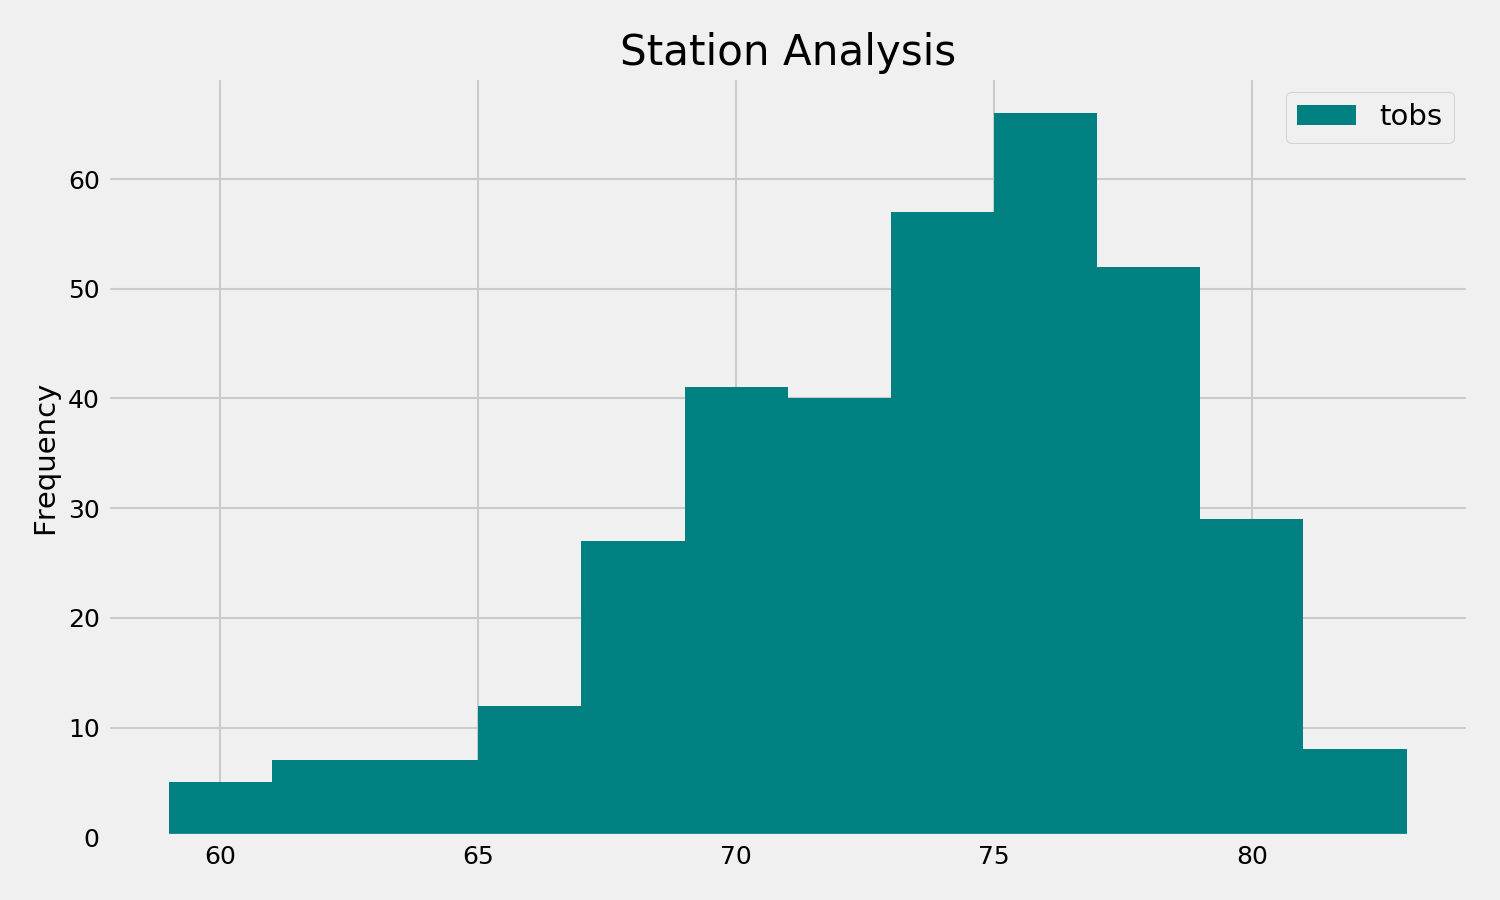

In [26]:
tobs_df.plot.hist(bins=12, zorder=2, title="Station Analysis", \
                  grid=True, figsize=(10,6), fontsize=12, color='teal')
plt.legend(loc=1, prop={'size': 14})
plt.ylabel('Frequency', size=14)

plt.show()


In [27]:
# Plot
plt.tight_layout()
plt.show()

## 6. Temperature Analysis (Optional)

### Temperature data

In [28]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVG, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), \
                         func.avg(Measurement.tobs), \
                         func.max(Measurement.tobs)).\
                    filter(Measurement.date >= start_date).\
                    filter(Measurement.date <= end_date).all()
   
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# Trip dates using the previous year's data:
start_date = '2016-10-28'
end_date = '2016-11-05'

# Convert list of tuples into normal list
calc_temps = list(np.ravel(calc_temps(start_date, end_date)))

# Create a dictionary using TMIN, TAVG, and TMAX as keys 
# and temperature calculations as the respecive values. 
for temp in calc_temps :
        calc_temps_dict = {}
        calc_temps_dict["TMIN"] = calc_temps [0]
        calc_temps_dict["TAVG"] = calc_temps [1]
        calc_temps_dict["TMAX"] = calc_temps [2]
    
print(calc_temps_dict)

{'TMIN': 68.0, 'TAVG': 75.85964912280701, 'TMAX': 79.0}


### Average temperature plotting

<IPython.core.display.Javascript object>


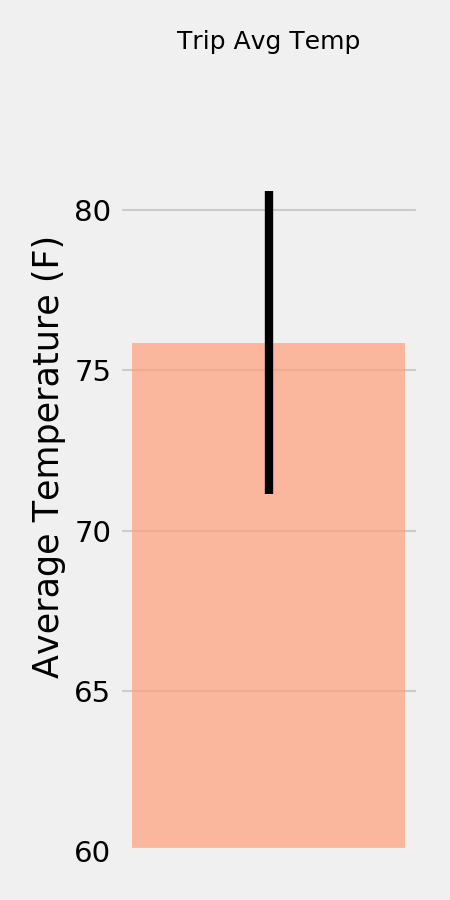

In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

TMIN = calc_temps_dict["TMIN"]
TAVG = calc_temps_dict["TAVG"]
TMAX = calc_temps_dict["TMAX"]

TLOWER = TAVG - TMIN
TUPPER = TMAX - TAVG

plt.figure(figsize=(3,6))
plt.bar(0, TAVG, yerr=[TUPPER-TLOWER], color='lightsalmon', alpha=0.7)
plt.title('Trip Avg Temp', size=12)
plt.xticks([])
plt.ylabel('Average Temperature (F)')
plt.ylim(60)

plt.tight_layout()
plt.show()

### Temperature calculation

In [31]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall_trip = session.query(Measurement.station, func.sum(Measurement.prcp)).\
                            filter(Measurement.date >= start_date, Measurement.date <= end_date).\
                                group_by(Measurement.station).all()

print("\n" + "-"*55 + "\n")
print("Precipitation Amount by Station (For Given Trip Dates):")
print("\n" + "-"*55 + "\n")

for station, rainfall in rainfall_trip:
    print(f"Station: {station}, Precipitation Amount: {rainfall}.")

print("\n" + "-"*55 + "\n")


-------------------------------------------------------

Precipitation Amount by Station (For Given Trip Dates):

-------------------------------------------------------

Station: USC00513117, Precipitation Amount: 0.2.
Station: USC00514830, Precipitation Amount: 0.47000000000000003.
Station: USC00516128, Precipitation Amount: 3.51.
Station: USC00517948, Precipitation Amount: None.
Station: USC00519281, Precipitation Amount: 0.5100000000000001.
Station: USC00519397, Precipitation Amount: 0.27.
Station: USC00519523, Precipitation Amount: 0.23.

-------------------------------------------------------



## 7. Other Recommended Analysis (Optional)

In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [35]:
# Plot the daily normals as an area plot with `stacked=False`